# Notebook for to create pictures for all graphs

This notebook contains all functions to calculate the coordinates for a graph, give this a 'value' according to a so-called target function and to run through all/as many possible inclinations as possible to find the best picture of a graph.

## Calculate the drawing
The code below is to calculate 'acceptable' drawings of a given graph.

In [28]:
def b_vector(encoding,delta,inclines):
     r"""
     Return the vector $b$ in the system $Ax=b$
     
     INPUT:
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     - ''inclines'' - a matrix of 2n inclines, of the form $[a_1^L,b_1^L; ... ;a_n^R,b_n^R]$
     
     OUTPUT:
     
     - a vector $b$ of size 2n x 1
     
     EXAMPLES:
     
         sage: b_vector(vector([2,1,1,0,1]),1,matrix([[1,1],[-1,1]]))
         (0,1)
         sage: b_vector(vector([2,2,1,0,1,1,2]),1,\matrix([[0,-1],[1,-1],[-1,0],[0,-1]]))
         (0,-1,0,0)
     """
     m=encoding[0]
     n=encoding[1]
    
     b=zero_vector(2*n)
     two_cycles_list=[]
     num_two_cycles=0
     for i in range(2*n):
         e=encoding[i+3]
         if e < m:
             b[i]=e*delta*inclines[i,1]
         else:    
             if encoding[2*e-1]==m+floor(i/2) or encoding[2*e]==m+floor(i/2):
                 two_cycle=sorted([e,m+floor(i/2)])
                 if two_cycle in two_cycles_list:
                     continue
                 num_two_cycles+=1
                 b[i]=num_two_cycles*delta
                 two_cycles_list.append(two_cycle)

     return b

In [29]:
def A_matrix(encoding,inclines):
     r"""
     Return the matrix A in the system Ax=b
     
     INPUT:
     
     - ''encoding'' - a vector of the form (m,n,s,e_1,e_2,...,e_2n)
     
     - ''inclines'' - a 2n x 2 matrix of the form [a_1^L,b_1^L;...;a_n^R,b_n^R]
     
     OUTPUT:
     
     - a matrix A of size 2n x 2n
     
     EXAMPLES:
         sage: A_matrix(vector([2,1,1,0,1]),matrix([[1 ,1] ,[ -1 ,1]]))
         [1,-1]
         [1,1]
         
         sage: A_matrix(vector([2,2,1,0,1,1,2]),matrix([[0,-1],[1,-1],[-1,0],[0,-1]]))
         [-1  0  0  0]
         [-1 -1  0  0]
         [ 0  0  0  1]
         [ 1  0 -1  0]
     
     """
     m=encoding[0]
     n=encoding[1]
     A=zero_matrix(2*n,2*n)
     two_cycles_list=[]
     for i in range(2*n):
         e=encoding[i+3]
         if e>=m:    
             if encoding[2*e-1]==m+floor(i/2) or encoding[2*e]==m+floor(i/2):
                two_cycle=sorted([e,m+floor(i/2)])
                if two_cycle in two_cycles_list:
                    if i%2 == 0:
                        A[i,i]=inclines[i,1]
                        A[i,i+1]=-inclines[i,0]
                        if e >= m:
                            A[i,2*(e-m+1)-2]=-inclines[i,1]
                            A[i,2*(e-m+1)-1]=inclines[i,0]
                    if i%2 == 1:
                        A[i,i]=-inclines[i,0]
                        A[i,i-1]=inclines[i,1]
                        if e >= m:
                            A[i,2*(e-m+1)-2]=-inclines[i,1]
                            A[i,2*(e-m+1)-1]=inclines[i,0]
                    continue
                two_cycles_list.append(two_cycle)
                if i%2 == 0:
                    A[i,i+1]=1
                if i%2 == 1:
                    A[i,i]=1
                continue           
         if i%2 == 0:
             A[i,i]=inclines[i,1]
             A[i,i+1]=-inclines[i,0]
             if e >= m:
                A[i,2*(e-m+1)-2]=-inclines[i,1]
                A[i,2*(e-m+1)-1]=inclines[i,0]
         if i%2 == 1:
             A[i,i]=-inclines[i,0]
             A[i,i-1]=inclines[i,1]
             if e >= m:
                A[i,2*(e-m+1)-2]=-inclines[i,1]
                A[i,2*(e-m+1)-1]=inclines[i,0]
         
     
     return A

In [30]:
def inclines_to_coordinates(encoding,inclines,delta):
     r"""
     returns a vector x containing the coordinates of the system defined by the encoding, inclines and delta
     
     INPUT:
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''inclines'' - a matrix of 2n inclines, of the form $[a_1^L,b_1^L; ... ;a_n^R,b_n^R]$
     
     - ''delta'' - a positive scalar
     
     OUTPUT:
     
     - a 2n x 1 vector x containing the coordinates of the form (x_1,y_1,...,x_n,y_n)
     
     EXAMPLES:
         sage: inclines_to_coordinates(vector([2,1,1,0,1]),matrix([[1 ,1] ,[ -1 ,1]]),1)
         (1/2,1/2)
         sage: inclines_to_coordinates(vector([2,2,1,0,1,0,1]),matrix([[0,1],[1,-1],[1,1],[0,1]]),1)
         (0,1,1,1)
     
     """
     A=A_matrix(encoding,inclines)
     b=b_vector(encoding,delta,inclines)
    
     if det(A)==0:
         x=0
     if abs(det(A))>0:
         x=A\b
         
     return x

In [31]:
def DrawGraph_algorithm(encoding,delta):
     r"""
     returns a matrix with coordinates of the internal nodes
     
     INPUT: 
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     OUTPUT:
     
     - an n x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n,y_n],
         because of randomization, the coordinates can change with each use of the function 
     
     EXAMPLES:
         sage: DrawGraph_algorithm(vector([2,1,1,0,1]),1)
         [ 0.818181818181818 -0.272727272727273]
         sage: DrawGraph_algorithm(vector([2,2,1,0,1,0,1]),1)
         [ 3.00000000000000  3.00000000000000]
         [0.307692307692308 0.230769230769231]
                  
     """

     #we're first generating all possible inclines, stored in set_of_inclines
     positive_inclines=matrix([[0,1],[1,0],[1,1],[1,2],[1,3],[1,4],\
     [2,1],[2,3],[3,1],[3,2],[3,4],[4,1],[4,3]])
     nofinclines=(positive_inclines.nrows()-1)*2
     half_nofi=nofinclines/2
     set_of_inclines=zero_matrix(nofinclines,2)
     for i in range(nofinclines):
         if i<=half_nofi:
             set_of_inclines[i,:]=positive_inclines[i,:]
         if i>half_nofi:
             set_of_inclines[i,0]=positive_inclines[i-half_nofi+1,0]
             set_of_inclines[i,1]=-positive_inclines[i-half_nofi+1,1]

     #from here on we will be computing the solution x
     #for a random set of inclines
     n=encoding[1]
     inclines=zero_matrix(2*n,2)
     x=0
     k=0
     while x==0:
         for i in range(2*n):
             k=ZZ.random_element(0,nofinclines)
             inclines[i,:]=set_of_inclines[k,:]
             if i%2 == 1:
                 if inclines[i,:]==inclines[i-1,:]:
                     if k==nofinclines-1:
                         inclines[i,:]=set_of_inclines[0,:]
                     if k<nofinclines-1:
                         inclines[i,:]=set_of_inclines[k+1,:]
         x=inclines_to_coordinates(encoding,inclines,delta)
         k=+1
                    
     #changing the look of the output
     coordinates=zero_matrix(RR,n,2)
     for i in range(n):
         coordinates[i,0]=x[2*i]
         coordinates[i,1]=x[2*i+1]
     #print('uncompatible:',k)   
     return coordinates

In [32]:
def positive_test(coordinates):
    
    r""""
    returns a value True or False based on whether the coordinates all lie above the line y=0
    
    INPUT:
    
    - ''coordinates'' - an n x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n,y_n]
    
    OUTPUT:
    
    - a value False or True, indicating whether the input matrix had coordinates below or on the line y=0
    
    EXAMPLES:
        sage: positive_test(matrix([[1,4],[2,3]]))
        True

        sage: positive_test(matrix([[1,4],[2,-2]]))
        False
        
        sage: positive_test(matrix([[1,0],[2,3],[4,5]]))
        False
    
    """
    n=coordinates.nrows()
    value=True
    for i in range(n):
        if coordinates[i,1]<=0:
            value = False
            break
    
    return value

In [33]:
def same_vertices_test(encoding, delta, n_coordinates):
    
    r""""
    returns a value True or False indicating whether the coordinates all indicate unique points
    
    INPUT:
    
    - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
    - ''delta'' - a positive scalar
    
    - ''n_coordinates'' - an n x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n,y_n]
    
    OUTPUT:
    
    - a value False or True, indicating whether the input matrix has unique coordinates
    
    EXAMPLES:
        sage: same_vertices_test(matrix([[1,2],[3,4],[1,2]]))
        False
        sage: same_vertices_test(matrix([[1,2],[3,4],[1,3]]))
        True
    
    """
    m=encoding[0]
    m_coordinates=zero_matrix(RR,m,2)
    for i in range(m):
        m_coordinates[i,0]=i*delta
    
    coordinates=block_matrix([[m_coordinates],[n_coordinates]])
    k=coordinates.nrows()
    value=True
    for i in range(k):
        if value==False:
            break
        for j in range(i+1,k):
            if coordinates[i,:]==coordinates[j,:]:
                value = False
                break
        
                
    return value

In [34]:
def length_test(encoding,delta,coordinates,min_len):
    r"""
    returns a value False or True 
    depending on whether any of the edges defined by the coordinates and encoding has 
    a length smaller than the minimal value min_len
    
    INPUT:
    
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     - ''coordinates'' - an n x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n,y_n]
     
     - ''min_len'' - a positive scalar
     
    OUTPUT:
    
    - a value False or True, denoting whether all edges of the defined graph are larger than the minimum lenght
    
    EXAMPLES:
        sage: length_test(vector([2,3,1,0,1,0,4,1,2]),40,matrix([[160,40],[210,105],[280,0]]),10)
        True
        sage: length_test(vector([2,1,1,0,1]),10,matrix([[1,3]]),10)
        False

    """
    
    
    m=encoding[0]
    n=encoding[1]
    value=True
    
    sink_coord=zero_matrix(RR,m,2)
    for i in range(m):
        sink_coord[i,0]=i*delta
    
    for i in range(n):
        source_vert_x=coordinates[i,0]
        source_vert_y=coordinates[i,1]
        
        
        goal_vert_L=encoding[3+2*i]
        goal_vert_R=encoding[4+2*i]
        if goal_vert_L <m:
            goal_vert_L_x=sink_coord[goal_vert_L,0]
            goal_vert_L_y=sink_coord[goal_vert_L,1]
        if goal_vert_L>=m:
            goal_vert_L_x=coordinates[goal_vert_L-m,0]
            goal_vert_L_y=coordinates[goal_vert_L-m,1]
            
        if goal_vert_R <m:
            goal_vert_R_x=sink_coord[goal_vert_R,0]
            goal_vert_R_y=sink_coord[goal_vert_R,1]
        if goal_vert_R>=m:
            goal_vert_R_x=coordinates[goal_vert_R-m,0]
            goal_vert_R_y=coordinates[goal_vert_R-m,1]    
        
        delta_L_x=source_vert_x-goal_vert_L_x
        delta_L_y=source_vert_y-goal_vert_L_y
        delta_R_x=source_vert_x-goal_vert_R_x
        delta_R_y=source_vert_y-goal_vert_R_y
        
       
        edge_length_sq=delta_L_x^2+delta_L_y^2
        edge_length=sqrt(edge_length_sq)
        if edge_length<min_len:
            value=False
            break
                    
        edge_length_sq=delta_R_x^2+delta_R_y^2
        edge_length=sqrt(edge_length_sq)
        if edge_length<min_len:
            value=False 
            break
    
    
    return value

In [35]:
def overlapping_edges_test(encoding,delta,n_coordinates):
    r"""
    returns a value False or True, depending on whether the defined graph has overlapping edges
    
    INPUT:
    
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     - ''n_coordinates'' - an n x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n,y_n]
     
     OUTPUT:
     
     - a value False or True,  depending on whether the defined graph has overlapping edges
     
     EXAMPLES:
         sage: overlapping_edges_test(vector([2,2,1,0,1,1,2]),10,matrix([[0,10],[5,5]]))
         False
         sage: overlapping_edges_test(vector([2,2,1,0,1,1,2]),10,matrix([[0,10],[10,10]]))
         True
    
    """
    m=encoding[0]
    n=encoding[1]
    value=True
    
    sink_coord=zero_matrix(RR,m,2)
    for i in range(m):
        sink_coord[i,0]=i*delta
    
    coordinates=block_matrix([[sink_coord],[n_coordinates]])

    edges_source_goal=zero_matrix(QQ,2*n,4)
    for i in range(2*n):
        if i%2==0:
            source_vertice_label=i/2+m
        else:
            source_vertice_label=(i-1)/2+m
        source_vertice_x=coordinates[source_vertice_label,0]
        source_vertice_y=coordinates[source_vertice_label,1]

        goal_vertice_label=encoding[3+i]
        goal_vertice_x=coordinates[goal_vertice_label,0]
        goal_vertice_y=coordinates[goal_vertice_label,1]

        edges_source_goal[i,:]=vector([source_vertice_x,source_vertice_y,goal_vertice_x,goal_vertice_y])
    
    for i in range(2*n):
        if value == False:
            break
        p_0=vector([edges_source_goal[i,0],edges_source_goal[i,1]])
        p_1=vector([edges_source_goal[i,2],edges_source_goal[i,3]])
        if p_0==p_1:
            continue
        r=p_1-p_0
        
        for j in range(i+1,2*n):
            q_0=vector([edges_source_goal[j,0],edges_source_goal[j,1]])
            q_1=vector([edges_source_goal[j,2],edges_source_goal[j,3]])
            if q_0==q_1:
                continue
            
            if p_0 == q_1 and p_1==q_0:
                continue

            s=q_1-q_0
            r_cross_s=r[0]*s[1]-r[1]*s[0]

            q_min_p=q_0-p_0
            q_min_p_cross_r=q_min_p[0]*r[1]-q_min_p[1]*r[0]

            if r_cross_s == 0 and q_min_p_cross_r == 0:
                t_0=q_min_p*r/(r*r)
                t_1=t_0+s*r/(r*r)
                if 0<=t_0<=1 or 0<=t_1<=1:
                    if t_0 == 0 and t_1<0:
                        continue
                    if t_0 == 1 and t_1>1:
                        continue
                    if t_1 == 0 and t_0<0:
                        continue
                    if t_1 == 1 and t_1>1:
                        continue
                    value = False
                    break

    return value

In [36]:
def DrawGraph_filter(encoding,delta,min_len):
    
    r"""
    returns coordinates that are a proper solution to the system
    
    INPUT: 
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     - ''min_len'' - a positive scalar
     
     OUTPUT:
     
     - an (m+n) x 2 matrix containing coordinates in the form [x_1,y_1;...;x_m+n,y_m+n],
         because of randomization, the coordinates can change with each use of the function 
         
     EXAMPLES:
         sage: DrawGraph_filter(vector([2,1,1,0,1]),40,10)
         [  0.000000000000   0.000000000000]
         [ 40.000000000000   0.000000000000]
         [---------------------------------]
         [120.000000000000 240.000000000000]
         
         sage: DrawGraph_filter(vector([2,2,1,0,1,0,1]),40,10)
         [  0.0000000000000   0.0000000000000]
         [ 40.0000000000000   0.0000000000000]
         [-----------------------------------]
         [-32.0000000000000  96.0000000000000]
         [ 48.0000000000000  16.0000000000000]
         
    """
    value = False
    k=0
    while value == False:
        n_coordinates=DrawGraph_algorithm(encoding,delta)
        v1=positive_test(n_coordinates)
        v2=same_vertices_test(encoding, delta, n_coordinates)
        v3=length_test(encoding,delta,n_coordinates,min_len)
        v4=overlapping_edges_test(encoding,delta,n_coordinates)
        value = all([v1,v2,v3,v4])
        k=k+1
        if k == 10^3:
            coordinates=0
            break
    #print('unacceptable:',k)
    m=encoding[0]
    m_coordinates=zero_matrix(RR,m,2)
    for i in range(m):
        m_coordinates[i,0]=i*delta

    coordinates=block_matrix([[m_coordinates],[n_coordinates]])

    return coordinates

In [37]:
def DrawGraph_filter_incl(encoding,n_coordinates,delta,min_len):
    
    r"""
    returns coordinates that are a proper solution to the system
    
    INPUT: 
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''n_coordinates'' - a n x 2 matrix of the form [x_1,y_1;...;x_n,y_n]
     
     - ''delta'' - a positive scalar
     
     - ''min_len'' - a positive scalar
     
     OUTPUT:
     
     - an (m+n) x 2 matrix containing coordinates in the form [x_1,y_1;...;x_m+n,y_m+n],
         because of randomization, the coordinates can change with each use of the function 
         
     EXAMPLES:
         sage: DrawGraph_filter(vector([2,1,1,0,1]),40,10)
         [  0.000000000000   0.000000000000]
         [ 40.000000000000   0.000000000000]
         [---------------------------------]
         [120.000000000000 240.000000000000]
         
         sage: DrawGraph_filter(vector([2,2,1,0,1,0,1]),40,10)
         [  0.0000000000000   0.0000000000000]
         [ 40.0000000000000   0.0000000000000]
         [-----------------------------------]
         [-32.0000000000000  96.0000000000000]
         [ 48.0000000000000  16.0000000000000]
         
    """
    if n_coordinates == 0:
        value = False
    else:
        v1=positive_test(n_coordinates)
        v2=same_vertices_test(encoding, delta, n_coordinates)
        v3=length_test(encoding,delta,n_coordinates,min_len)
        v4=overlapping_edges_test(encoding,delta,n_coordinates)
        value = all([v1,v2,v3,v4])
        

    return value

In [38]:
def DrawGraph_compute_and_draw(encoding,delta,min_len):
    r"""
    returns a randomized plot of the graph defined by the encoding
    
    INPUT: 
     
     - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
     - ''delta'' - a positive scalar
     
     - ''min_len'' - a positive scalar
     
     OUTPUT:
     
     - a graphics plot 
         
    """
    
    m=encoding[0]
    n=encoding[1]
    
    coord=DrawGraph_filter(encoding,delta,min_len)
    coordinates=coord.rows()
    points=point2d(coord,size=50)
    plot_list=[points]
    
    for i in range(n):
        source_vertice=coordinates[m+i]
        
        left_vertice_label=encoding[2*i+3]
        right_vertice_label=encoding[2*i+4]
        
        left_vertice=coordinates[left_vertice_label]
        right_vertice=coordinates[right_vertice_label]
        
        left_edge=arrow2d(source_vertice,left_vertice)
        right_edge=arrow2d(source_vertice,right_vertice)
        
        plot_list.append(left_edge)
        plot_list.append(right_edge)
        
        plot=points
    for i in range(len(plot_list)-1):
        plot+=plot_list[i+1]
    
    
    return plot

In [39]:
def DrawGraph_draw(encoding,coord):
    r"""
    returns a randomized plot of the graph defined by the encoding
    
    INPUT: 
     
    - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
    - ''coord'' - an (m+n) x 2 matrix containing coordinates in the form [x_1,y_1;...;x_m+n,y_m+n]
     
    OUTPUT:
     
    - a graphics plot 
         
    """
    
    m=encoding[0]
    n=encoding[1]
    
    
    coordinates=coord.rows()
    points=point2d(coord,size=50)
    plot_list=[points]
    
    for i in range(n):
        source_vertice=coordinates[m+i]
        
        left_vertice_label=encoding[2*i+3]
        right_vertice_label=encoding[2*i+4]
        
        left_vertice=coordinates[left_vertice_label]
        right_vertice=coordinates[right_vertice_label]
        
        left_edge=arrow2d(source_vertice,left_vertice)
        right_edge=arrow2d(source_vertice,right_vertice)
        
        plot_list.append(left_edge)
        plot_list.append(right_edge)
        
        plot=points
    for i in range(len(plot_list)-1):
        plot+=plot_list[i+1]
    
    
    return plot

## The Target Function
The code below consists of helper functions and the target function itself.
The target function gives a value to a drawing, denoting how 'beautiful' it is.

In [40]:
def intersection_test(p_1,p_2,q_1,q_2):
    r"""
    returns a value True or False indicating whether the line segments defined by the points intersect

    INPUT:

    - ''p_1'' - a vector indicating the source point of the first line segment

    - ''p_2'' - a vector indicating the end point of the first line segment

    - ''q_1'' - a vector indicating the source point of the second line segment

    - ''q_2'' - a vector indicating the end point of the second line segment

    OUTPUT:

    - a value True or False, depending on whether the line segments intersect

    EXAMPLES:
        sage: intersection_test(vector([1,1]),vector([4,4]),vector([3,0]),vector([1,4]))
        True
        sage: intersection_test(vector([1,0]),vector([3,3]),vector([5,2]),vector([3,5]))
        False
    """
    
    value=False
    #computing r
    r=zero_vector(RR,2)
    r[0]=p_2[0]-p_1[0]
    r[1]=p_2[1]-p_1[1]

    #computing s
    s=zero_vector(RR,2)
    s[0]=q_2[0]-q_1[0]
    s[1]=q_2[1]-q_1[1]

    r_x_s=r[0]*s[1]-r[1]*s[0]
    if r_x_s!=0:
        q_min_p=q_1-p_1
        q_min_p_x_s=q_min_p[0]*s[1]-q_min_p[1]*s[0]
        t=q_min_p_x_s/r_x_s

        q_min_p_x_r=q_min_p[0]*r[1]-q_min_p[1]*r[0]
        u=q_min_p_x_r/r_x_s

        if 0<=t<=1 and 0<=u<=1:
            value=True
            if t == 0:
                if u == 0 or u == 1:
                    value=False
            if t == 1:
                if u == 0 or u == 1:
                    value=False
            

    return value

In [41]:
def points_on_line_test(coordinates):
    r"""
    INPUT:
    
    - ''coordinates'' - an (n+m) x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n+m,y_n+m]
    """
    
    num_vertices=coordinates.nrows()
    
    num_vert_on_line = 1
    for i in range(num_vertices):
        a_x=coordinates[i,0]
        a_y=coordinates[i,1]
        for j in range(i+1,num_vertices):
            b_x=coordinates[j,0]
            b_y=coordinates[j,1]
            s=vector([b_x-a_x,b_y-a_y])
            norm_s=s*s
            for k in range(j+1,num_vertices):
                v=vector([coordinates[k,0]-a_x,coordinates[k,1]-a_y])
                proj_len=(v*s)/norm_s
                proj=proj_len*s
                if proj == v:
                    num_vert_on_line +=1
                    #print(i,j,k,s,v,proj_len)
    return num_vert_on_line

In [42]:
def target_function(encoding,delta,coordinates):
    r"""
    returns a score denoting how 'beautiful' the drawing of the graph is
    
    INPUT:
    
    - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
    
    - ''coordinates'' - an (n+m) x 2 matrix containing coordinates in the form [x_1,y_1;...;x_n+m,y_n+m]
    
    OUTPUT:
    
    - a scalar, the larger the value, the less 'beautiful' the drawing is
    
    EXAMPLES:
    
    """
    
    #the parameters
    L_0 =  50        #short and long edges score
    L_1 = 20         #distance between unrelated vertices
    L_2 = 0.4*L_0    #height y-coordinate
    c_se = 5         #short edges
    c_le = 16        #long edges
    c_dv = 10        #distance between unrelaed vertices
    c_ss = 0         #symmetry
    c_hy = 1        #height y-coordinate
    c_os = 1         #overshoot
    alpha = 0.9      #short edges
    beta = 1         #long edges
    gamma = 15       #intersections
    epsilon = 5      #intersections
    zeta = 5         #unrelated vertices
    eta = 10         #symmetry
    theta = 20       #height y-coordinate
    iota = 5         #overshoot
    kappa = 10       #points on one line
    labda = 5        #points on one line
    mu = 2           #horizontal lines
    nu = 1           #horizontal lines
    
    #getting the prerequisites from the data
    m=encoding[0]
    n=encoding[1]
    
    #vertices_sink is an n x 4 matrix of which the first two columns give the coordinates for the left vertice with\
    #which the source is connected and the column 2 and 3 give the coordinates for the right vertice
    #edges_length is an n x 2 matrix of which the first column gives the lenght of the left edge of the source vertex\
    #and the second column gives the length of the right edge
    #edges_begin_end is a 2n x 4 matrix containing the begin and end point of each edges in the rows
    vertices_sink = zero_matrix(RR,n,4)
    edges_length=zero_matrix(RR,n,2)
    edges_begin_end=zero_matrix(RR,2*n,4)

    for i in range(n):
        e_L=encoding[3+2*i]
        e_R=encoding[4+2*i]
        vertices_sink[i,0:2]=coordinates[e_L,:]
        vertices_sink[i,2:4]=coordinates[e_R,:]
        
        coord_source_x=coordinates[m+i,0]
        coord_source_y=coordinates[m+i,1]
        edges_begin_end[[2*i,2*i+1],0]=coord_source_x
        edges_begin_end[[2*i,2*i+1],1]=coord_source_y

        coord_sink_L_x=coordinates[e_L,0]
        coord_sink_L_y=coordinates[e_L,1]
        edges_begin_end[2*i,2]=coord_sink_L_x
        edges_begin_end[2*i,3]=coord_sink_L_y


        coord_sink_R_x=coordinates[e_R,0]
        coord_sink_R_y=coordinates[e_R,1]
        edges_begin_end[2*i+1,2]=coord_sink_R_x
        edges_begin_end[2*i+1,3]=coord_sink_R_y
        
        delta_x_L=coord_source_x-coord_sink_L_x
        delta_y_L=coord_source_y-coord_sink_L_y
        
        delta_x_R=coord_source_x-coord_sink_R_x
        delta_y_R=coord_source_y-coord_sink_R_y
        
        edges_length[i,0] = sqrt(delta_x_L^2+delta_y_L^2)
        edges_length[i,1] = sqrt(delta_x_R^2+delta_y_R^2)
        
    
    # short edges
    short_edges_score=0
    #long edges
    long_edges_score = 0
    for i in range(n):
        length_L=edges_length[i,0]
        length_R=edges_length[i,1]
        
        left_short_edges_score = c_se*(L_0/length_L)^alpha
        right_short_edges_score =c_se*(L_0/length_R)^alpha
        
        left_long_edges_score = c_le*(length_L/L_0)^beta
        right_long_edges_score = c_le*(length_R/L_0)^beta
        
        short_edges_score += left_short_edges_score+right_short_edges_score
        long_edges_score += left_long_edges_score+right_long_edges_score
    
    #intersections score
    intersections_score = 0
    num_of_intersections=1

    for i in range(2*n):
        p_0=vector([edges_begin_end[i,0],edges_begin_end[i,1]])
        p_1=vector([edges_begin_end[i,2],edges_begin_end[i,3]])

        for j in range(i+1,2*n):
            q_0=vector([edges_begin_end[j,0],edges_begin_end[j,1]])
            q_1=vector([edges_begin_end[j,2],edges_begin_end[j,3]])

            if p_0==q_0 or p_0 == q_1:
                continue
            if p_1 == q_0 or p_1 == q_1:
                continue
            
            value=intersection_test(p_0,p_1,q_0,q_1)
            if value == True:
                num_of_intersections+=1
    
    intersections_score = num_of_intersections^gamma*RDF(log(num_of_intersections))^epsilon
    
    #distance between unrelated vertices
    distance_vertices_score=0
    for i in range(n):
        vertex_1_x=coordinates[i+m,0]
        vertex_1_y=coordinates[i+m,1]
        for j in range(i+m):
            if j == encoding[3+2*i] or j == encoding[4+2*i]:
                continue
            vertex_2_x=coordinates[j,0]
            vertex_2_y=coordinates[j,1]
            Lenght_ij_sq=(vertex_2_x-vertex_1_x)^2+(vertex_2_y-vertex_1_y)^2
            Lenght_ij=sqrt(Lenght_ij_sq)
            distance_vertices_score+=c_dv*(L_1/Lenght_ij)^zeta

        for j in range(i+m+1,n+m):
            if j == encoding[3+2*i] or j == encoding[4+2*i]:
                continue
            vertex_2_x=coordinates[j,0]
            vertex_2_y=coordinates[j,1]
            Lenght_ij_sq=(vertex_2_x-vertex_1_x)^2+(vertex_2_y-vertex_1_y)^2
            Lenght_ij=sqrt(Lenght_ij_sq)
            distance_vertices_score+=c_dv*(L_1/Lenght_ij)^zeta
            
    #height y-coordinate score
    height_y_score=0
    for i in range(n):
        vertex_y=coordinates[m+i,1]
        height_y_score+=c_hy*(L_2/vertex_y)^theta
    
    #overshoot score
    overshoot_score = 0
    for i in range(n):
        vertex_x=coordinates[m+i,0]
        if vertex_x>delta:
            overshoot_score += c_os*(vertex_x-delta)^iota
        if vertex_x<0:
            overshoot_score += c_os*abs(vertex_x)^iota
            
    #points on line score
    num_vert_on_line = points_on_line_test(coordinates)
    points_on_line_score = -num_vert_on_line^kappa*RDF(log(num_vert_on_line))^labda
    
    #horizontal 'lines' score
    num_horizontal_lines=1
    for i in range(m+n):
        p_x=coordinates[i,0]
        for j in range(i+1,m+n):
            q_x=coordinates[j,0]
            if p_x==q_x:
                num_horizontal_lines+=1
    horizontal_lines_score = -num_horizontal_lines^mu*RDF(log(num_horizontal_lines))^nu
    
    #symmetry score
    symmetry_score=0
    for i in range(n):
        vertex_x=coordinates[m+i,0]
        if vertex_x<=0.5*delta:
            symmetry_score+=-c_ss*(0.5*delta-vertex_x)^eta
        if vertex_x>0.5*delta:
            symmetry_score+=c_ss*(vertex_x-0.5*delta)^eta

    score=short_edges_score+long_edges_score+intersections_score\
    +distance_vertices_score+height_y_score\
    +overshoot_score+horizontal_lines_score+points_on_line_score+symmetry_score
    
    
    return score

## Code for a runthrough of multiple inclines
The code below is to let the user generate all possible acceptable drawings, or just a certain number of them.
There are also functions to determine the best 5 pictures.

In [43]:
def generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations):
    r"""
    returns a list containing coordinates for the system determined by encoding and delta

    INPUT: 
     
    - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
    - ''delta'' - a positive scalar
     
    - ''min_len'' - a positive scalar

    - ''num_of_iterations'' - a positive integer

    OUTPUT:

    - a list containing num_of_iterations times a solution to the system

    """
    
    n=encoding[1]
    list_of_coordinates=[]
    
    if n<=3:
        #we're first generating all possible inclines, stored in set_of_inclines
        positive_inclines=matrix([[0,1],[1,0],[1,1],[1,2],[1,3],[1,4],\
        [2,1],[2,3],[3,1],[3,2],[3,4],[4,1],[4,3]])
        nofinclines=(positive_inclines.nrows()-1)*2
        half_nofi=nofinclines/2
        set_of_inclines=zero_matrix(nofinclines,2)
        for i in range(nofinclines):
            if i<=half_nofi:
                set_of_inclines[i,:]=positive_inclines[i,:]
            if i>half_nofi:
                set_of_inclines[i,0]=positive_inclines[i-half_nofi+1,0]
                set_of_inclines[i,1]=-positive_inclines[i-half_nofi+1,1]
        
        m=encoding[0]
        m_coordinates=zero_matrix(RR,m,2)
        for i in range(m):
            m_coordinates[i,0]=i*delta
        unacceptable_counter=0
        uncompatible_counter=0
        for i in range(nofinclines):
            inclines=zero_matrix(2*n,2)
            inclines[0,:]=set_of_inclines[i,:]
            for j in range(3):
                incl = set_of_inclines[j,:]
                if incl == inclines[0,:]:
                    continue
                inclines[1,:]=incl
                if n == 1:
                    x=inclines_to_coordinates(encoding,inclines,delta)
                    if x == 0:
                        uncompatible_counter+=1
                        continue
                    n_coordinates=zero_matrix(RR,n,2)
                    for q in range(n):
                        n_coordinates[q,0]=x[2*q]
                        n_coordinates[q,1]=x[2*q+1]
                    value=DrawGraph_filter_incl(encoding,n_coordinates,delta,min_len)
                    if value == False:
                        unacceptable_counter+=1
                        continue
                    coordinates=block_matrix([[m_coordinates],[n_coordinates]])
                    list_of_coordinates.append(coordinates)
                    continue
                for k in range(nofinclines):
                    inclines[2,:]=set_of_inclines[k,:]
                    for l in range(nofinclines):
                        incl=set_of_inclines[l,:]
                        if incl==inclines[2,:]:
                            continue
                        inclines[3,:]=incl
                        if n == 2:
                            x=inclines_to_coordinates(encoding,inclines,delta)
                            if x == 0:
                                uncompatible_counter+=1
                                continue
                            n_coordinates=zero_matrix(RR,n,2)
                            for r in range(n):
                                n_coordinates[r,0]=x[2*r]
                                n_coordinates[r,1]=x[2*r+1]
                            value=DrawGraph_filter_incl(encoding,n_coordinates,delta,min_len)
                            if value == False:
                                unacceptable_counter+=1
                                continue
                            coordinates=block_matrix([[m_coordinates],[n_coordinates]])
                            list_of_coordinates.append(coordinates)
                            continue
                        for o in range(5):
                            inclines[4,:]=set_of_inclines[4*o,:]
                            for p in range(5):
                                incl=set_of_inclines[1+4*p,:]
                                if incl==inclines[4,:]:
                                    continue
                                inclines[5,:]=incl
                                x=inclines_to_coordinates(encoding,inclines,delta)
                                if x == 0:
                                    uncompatible_counter+=1
                                    continue
                                n_coordinates=zero_matrix(RR,n,2)
                                for s in range(n):
                                    n_coordinates[s,0]=x[2*s]
                                    n_coordinates[s,1]=x[2*s+1]
                                value=DrawGraph_filter_incl(encoding,n_coordinates,delta,min_len)
                                if value == False:
                                    unacceptable_counter+=1
                                    continue
                                coordinates=block_matrix([[m_coordinates],[n_coordinates]])
                                list_of_coordinates.append(coordinates)
        print('unacceptable:',unacceptable_counter)
        print('uncompatible:',uncompatible_counter)
        
    else:
        for i in range(num_of_iterations):
            coordinates=DrawGraph_filter(encoding,delta,min_len)
            list_of_coordinates.append(coordinates)
    print('number of acceptable coordinates',len(list_of_coordinates))
    return list_of_coordinates

In [44]:
def choosing_best_five_pictures(encoding,delta,min_len,num_of_iterations,list_of_coordinates=0,list_of_unique_coordinates=0):
    r"""
    returns the five best coordinates after a certain number of applying DrawGraph_filter

    INPUT:
     
    - ''encoding'' - a vector of the form $[m,n,s,e_1,e_2,...,e_2n]$
     
    - ''delta'' - a positive scalar
     
    - ''min_len'' - a positive scalar

    - ''num_of_iterations'' - a positive integer

    OUTPUT:

    - a list of 5 coordinate systems

    """
    m=encoding[0]
    n=encoding[1]
    
    e_list=[]
    for i in range(n):
        e_list.append([encoding[2*i+3],encoding[2*i+4]])
        
        
    if list_of_coordinates == 0:                   
        list_of_coordinates=generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations)
    if list_of_unique_coordinates == 0:
        list_of_unique_coordinates=[]
        for i in range(num_of_iterations):
            list_of_unique_coordinates.append(list_of_coordinates[i])
    
        length = len(list_of_coordinates)
        for i in range(length):
            coord_1=list_of_coordinates[i]
            for j in range(i+1,length):
                coord_2=list_of_coordinates[j]
                if coord_1==coord_2:
                    list_of_unique_coordinates.remove(coord_1)
                    break
                        
    num_unique_coordinates=len(list_of_unique_coordinates)
                
    score_list=[]
    for i in range(num_unique_coordinates):
        score=target_function(encoding,delta,list_of_unique_coordinates[i])
        score_list.append([score,i])
    
    score_list=sorted(score_list)
    best_score_list=[]
    best_five=[]
    if num_unique_coordinates<10:
        best_five=list_of_unique_coordinates
    else:
        for i in range(10):
            best_score_list.append(score_list[i][0])
            k=score_list[i][1]
            best_five.append(list_of_unique_coordinates[k])

    return best_five

# Running the Program on Data
Everything above was the actual program, below only follow some functions that help with running the data plus the actual running

In [45]:
def find_unique_coordinates(list_of_coordinates):
    r"""
    This function removes all duplicate coordinates from the list.
    """
    
    list_of_unique_coordinates=[]
    num_coordinates=len(list_of_coordinates)
    for i in range(num_coordinates):
        if list_of_coordinates[i] in list_of_unique_coordinates:
            continue
        else:
            list_of_unique_coordinates.append(list_of_coordinates[i])
    print("num coordinates: ", num_coordinates, ", num unique coords: ", len(list_of_unique_coordinates))
    return list_of_unique_coordinates

In [46]:
import time
start=time.time()
encoding = vector([2,1,1,0,1])
delta=50
min_len=10
num_of_iterations=6000000
list_of_coordinates=generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations)
end=time.time()
print("time:",end-start)

unacceptable: 30
uncompatible: 23
number of acceptable coordinates 16
time: 0.2926757335662842


In [20]:
start=time.time()
list_of_unique_coordinates = find_unique_coordinates(list_of_coordinates)
end=time.time()
print("time:",end-start)

num coordinates:  16 , num unique coords:  16
time: 0.003737211227416992


In [21]:
import time
start=time.time()
num_coordinates=len(list_of_unique_coordinates)
                
score_list=[]
for i in range(num_coordinates):
    score=target_function(encoding,delta,list_of_unique_coordinates[i])
    score_list.append([score,i])
    
score_list=sorted(score_list)
best_score_list=[]
best_five=[]
if num_coordinates<10:
    best_five=list_of_unique_coordinates
else:
    for i in range(10):
        best_score_list.append(score_list[i][0])
        k=score_list[i][1]
        best_five.append(list_of_unique_coordinates[k])
end=time.time()
print("time:",end-start)
best_five

time: 0.12290811538696289


[
[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  25.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  33.3333333333333],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  37.5000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  66.6666666666667],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  75.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000

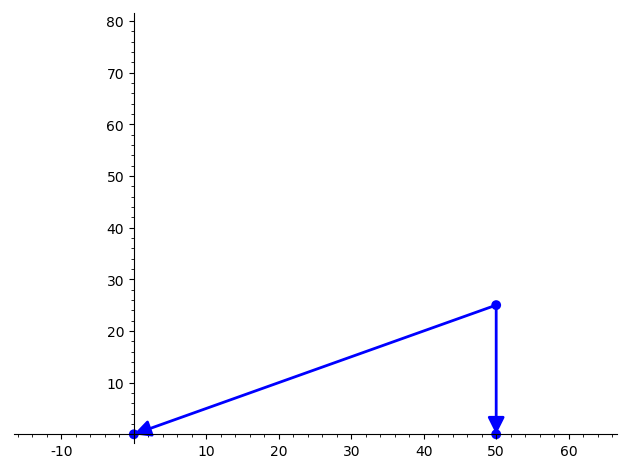

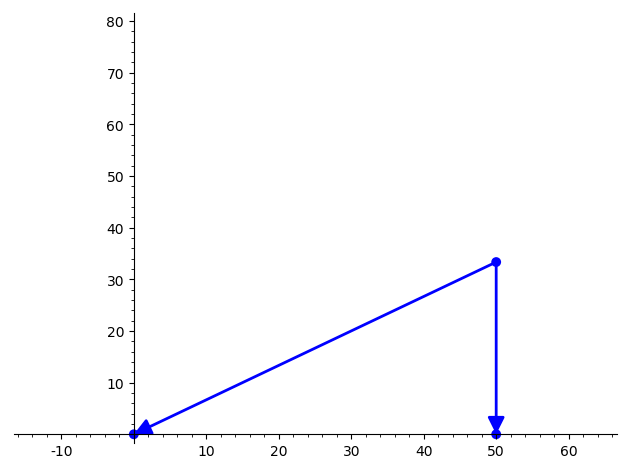

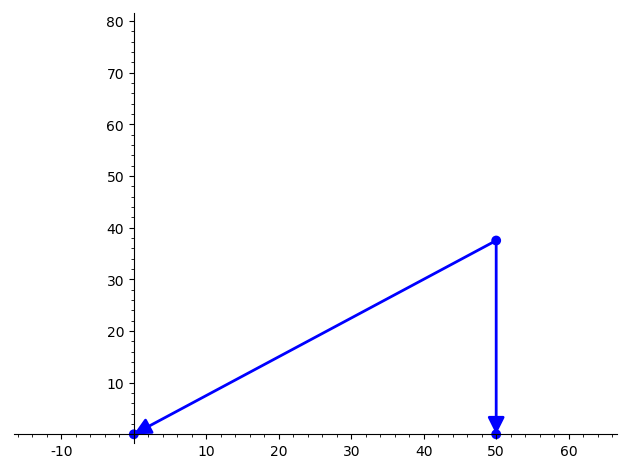

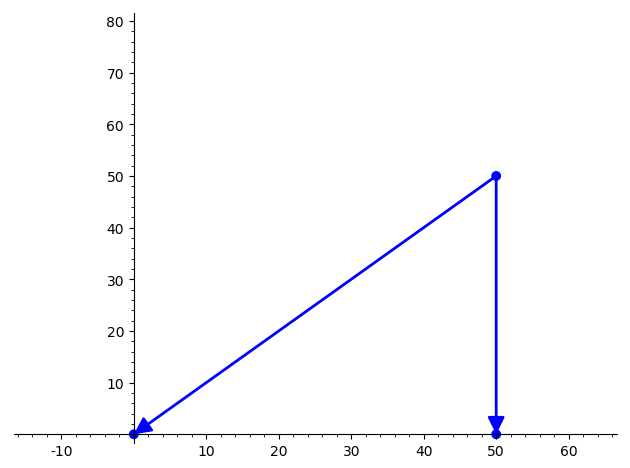

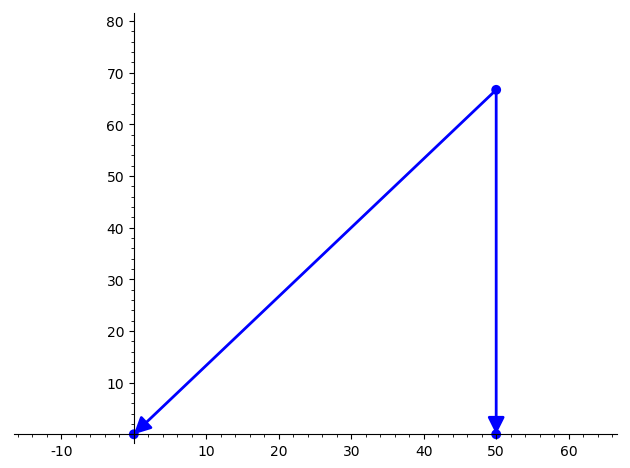

In [22]:
for i in range(5):
    show(DrawGraph_draw(encoding,best_five[i]),ymax=delta+30,xmax=65,xmin=-15)

## Example run for the encoding 2 2 1 01 01

In [23]:
import time
start=time.time()
encoding = vector([2,2,1,0,1,0,1])
delta=50
min_len=10
num_of_iterations=100
list_of_coordinates= generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations)
unique_coordinates = find_unique_coordinates(list_of_coordinates)
best_five=choosing_best_five_pictures(encoding,delta,min_len,num_of_iterations,list_of_unique_coordinates = unique_coordinates)
end=time.time()
print("time:",end-start)
best_five

unacceptable: 33928
uncompatible: 529
number of acceptable coordinates 3631
num coordinates:  3631 , num unique coords:  3631
unacceptable: 33928
uncompatible: 529
number of acceptable coordinates 3631
time: 599.1309373378754


[
[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  37.5000000000000]
[ 30.0000000000000  20.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000]
[ 28.5714285714286  21.4285714285714],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000]
[ 30.0000000000000  20.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000]
[ 33.3333333333333  22.2222222222222],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000]
[ 32.0000000000000  24.0000000000000],

[0.000000000000000 0.000000000000000]


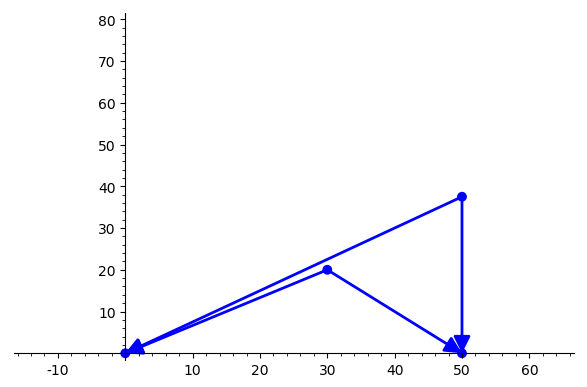

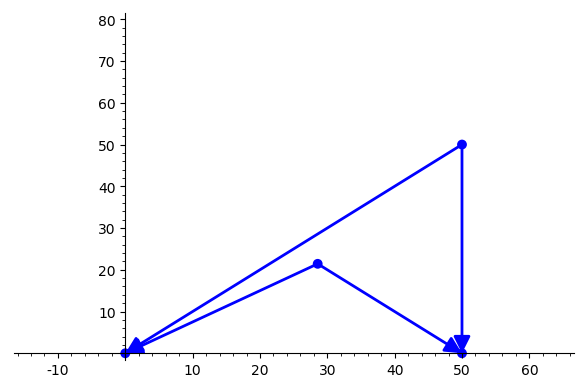

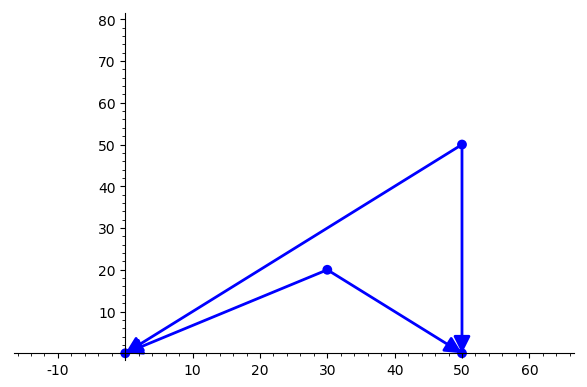

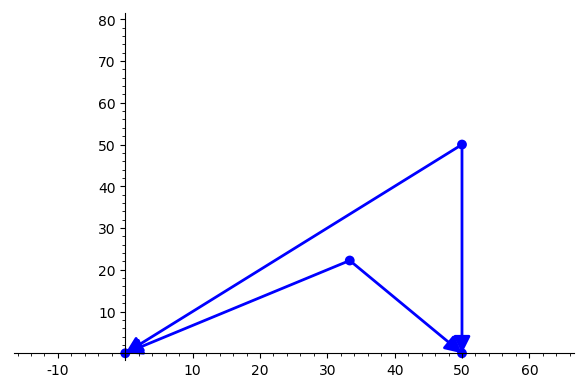

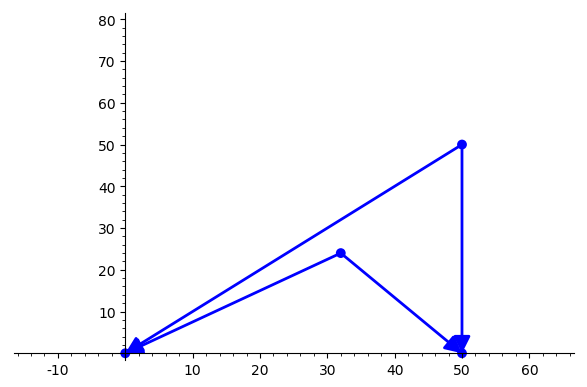

In [24]:
for i in range(5):
    show(DrawGraph_draw(encoding,best_five[i]),ymax=delta+30,xmax=65,xmin=-15)

## Example run for 2 4 1 03 04 13 04

In [47]:
#1
import time
start=time.time()
encoding = vector([2,4,1,0,3,0,4,1,3,0,4])
delta=50
min_len=10
num_of_iterations=10000
list_of_coordinates_03041304=generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations)
list_of_unique_coordinates_03041304=find_unique_coordinates(list_of_coordinates_03041304)
num_coordinates=len(list_of_coordinates_03041304)
best_five=choosing_best_five_pictures(encoding,delta,min_len,num_of_iterations,list_of_unique_coordinates = list_of_unique_coordinates_03041304)
end=time.time()
print("time:",end-start)
print(num_coordinates,len(list_of_unique_coordinates_03041304))

KeyboardInterrupt: 

In [ ]:
save(list_of_unique_coordinates_03041304,'list_of_unique_coordinates_03041304')

## Input a string
Plus example for the wedge

In [81]:
def string_to_vector(encoding_string):
    encoding = []
    for x in encoding_string:
        if x.isdigit():
            encoding.append(int(x))
    return vector(encoding[0:len(encoding)-1])

In [85]:
def find_best_five_from_string(encoding_string):
    import time
    start=time.time()
    encoding = string_to_vector(encoding_string)
    print(encoding)
    delta=50
    min_len=10
    num_of_iterations=10000
    list_of_coordinates=generate_list_of_coordinates(encoding,delta,min_len,num_of_iterations)
    list_of_unique_coordinates=find_unique_coordinates(list_of_coordinates)
    num_coordinates=len(list_of_coordinates)
    best_five=choosing_best_five_pictures(encoding,delta,min_len,num_of_iterations,list_of_unique_coordinates = list_of_unique_coordinates)
    end=time.time()
    print("time:",end-start)
    print(num_coordinates,len(list_of_unique_coordinates))
    return best_five

In [86]:
string = "2 1 1   0 1    1"
best_five = find_best_five_from_string(string)
best_five

(2, 1, 1, 0, 1)
unacceptable: 30
uncompatible: 23
number of acceptable coordinates 16
num coordinates:  16 , num unique coords:  16
unacceptable: 30
uncompatible: 23
number of acceptable coordinates 16
time: 0.4481184482574463
16 16


[
[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  25.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  33.3333333333333],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  37.5000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  50.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  66.6666666666667],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000]
[-----------------------------------]
[ 50.0000000000000  75.0000000000000],

[0.000000000000000 0.000000000000000]
[ 50.0000000000000 0.000000000000000

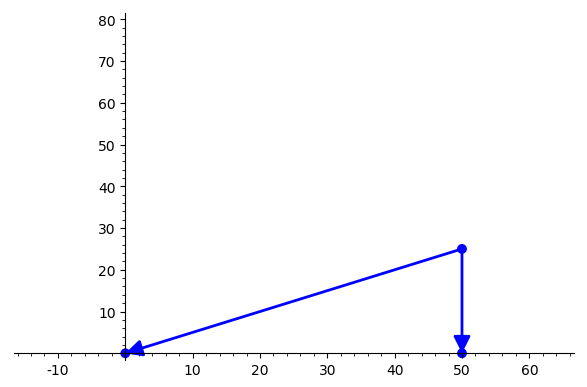

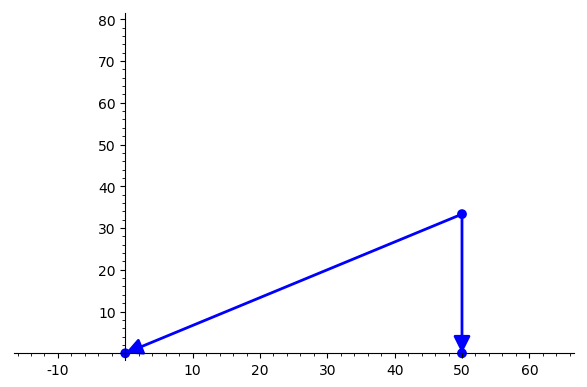

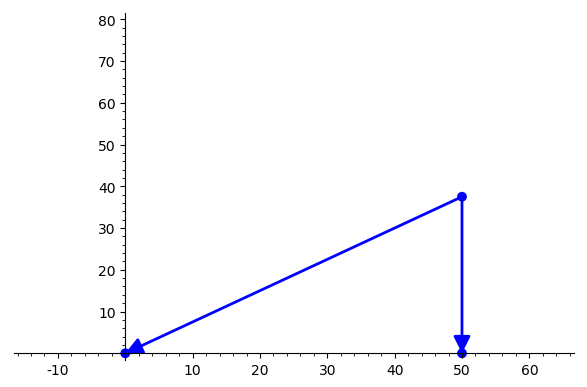

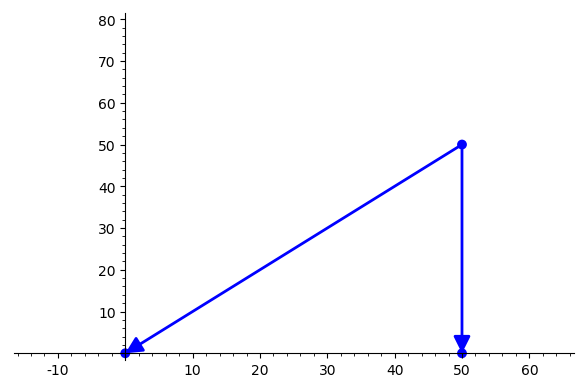

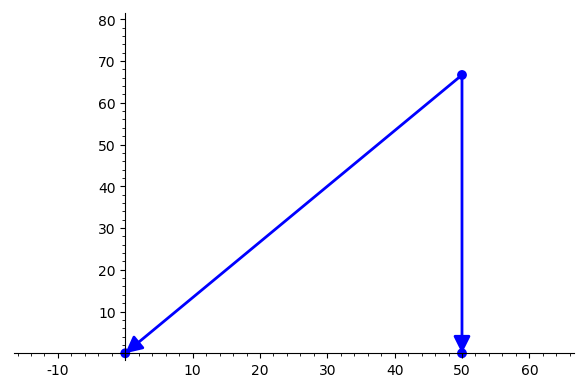

In [88]:
for i in range(5):
    show(DrawGraph_draw(string_to_vector(string),best_five[i]),ymax=delta+30,xmax=65,xmin=-15)